# Árboles de Decisión y Máquina de Soporte de Vectores

# Objetivos
- Conocer los fundamentos de los métodos de árbol de decisión y máquina de soporte de vectores (SVM)
- Generar modelos SVM para tareas de clasificación sin y con ajuste de hiperparámetros
- Aprender nuevas métricas de desempeño para clasificación binaria

# Árboles de decisión


## Generalidades

Modelo para predecir la variable objetivo mediante reglas simples de inferencia (if - then)

Tiene una estructura del tipo diagrama de flujo (árbol) en la que cada nodo representa la prueba lógica de algún atributo

<center>
    <img src="figures/decision-tree.png" width="600"/>
</center>

Los caminos desde raiz hasta hojas representan las reglas de clasificación (o regresión)

## Función de costo

Usualmente se usa la impureza Gini para medir el desempeño en cada nodo

La impureza Gini $G$ se calcula de la siguiente forma, en donde $C$ es la cantidad de clases y $p(i)$ es la probabilidad de aleatoriamente elegir una muestra de la clase $i$

\begin{split}
    G = \sum_{i=1}^{C}p(i) (1-p(i))
\end{split}

Este valor representa la probabilidad de clasificar una muestra incorrectamente

Un algoritmo se encarga de ir probando valores para los atributos con el objetivo de reducir la impureza de cada rama

In [1]:
import pandas as pd
rpm = [100, 120, 120, 100, 110, 120, 115]
torque = [35, 38, 21, 34, 24, 37, 37]
corriente = [1.2, 1.2, 1.3, 1.4, 1.1, 0.9, 1.0]
falla = [0, 0, 1, 0, 1, 1, 0]

X = {'rpm':rpm, 'torque':torque, 'corriente':corriente}
y = falla
X = pd.DataFrame.from_dict(X)
y = pd.DataFrame(y)

X.insert(0, "target", y)
display(X)

#observaciones clase 0 = 4, observaciones clase 1 = 3, total observaciones = 7
gini = (4./7.)*(1.-(4./7.)) + (3./7.)*(1.-(3./7.))
print('impureza gini = ', gini)

,target,rpm,torque,corriente
0,0,100,35,1.2
1,0,120,38,1.2
2,1,120,21,1.3
3,0,100,34,1.4
4,1,110,24,1.1
5,1,120,37,0.9
6,0,115,37,1.0


impureza gini =  0.4897959183673469


[Text(0.4, 0.8333333333333334, 'x[1] <= 29.0\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'), Text(0.2, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'), Text(0.30000000000000004, 0.6666666666666667, 'True  '), Text(0.6, 0.5, 'x[2] <= 0.95\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'), Text(0.5, 0.6666666666666667, '  False'), Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'), Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]


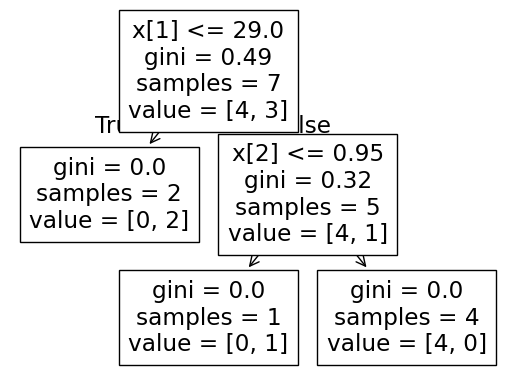

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import numpy as np

X = np.transpose(np.array([rpm, torque, corriente]))
y = np.array(falla)

clf = DecisionTreeClassifier().fit(X, y)

print(tree.plot_tree(clf))

## Ventajas y desventajas 

Ventajas
- Simple de entender e interpretar
- Modelos son fácilmente visualizables
- No requiere mayor pre-procesamiento de datos

Desventajas
- Tienden a sufrir mucho de overfitting
- Pueden ser inestables ante pequeñas variaciones en los datos
- Predicciones no son continuas ni suaves

# Máquina de Soporte de Vectores
(Support Vector Machine, SVM)

## Generalidades
Se trata de encontrar el hiperplano que maximize la distancia (o márgen) entre datos con distinta clasificación

<center>
    <img src="figures/svm1.png" width="600"/>
</center>

Los datos (u observaciones) que justo definen uno de los márgenes se llaman vectores de soporte

Si los datos no son linealmente separables, habrán algunas muestras al lado "incorrecto" de cada hiperplano

<center>
    <img src="figures/svm2.png" width="600"/>
</center>

En este caso el algoritmo se encarga de encontrar los hiperplanos que minimizen estas clasificaciones incorrectas (soft margin)

Usando distintas funciones base (kernel), el algoritmo puede adaptarse para márgenes de decisión que no sean necesariamente planos

<center>
    <img src="figures/svm3.png" width="600"/>
</center>

También existe una versión del SVM para tareas de regresión

## Formulación

Un hiperplano cualquiera puede ser escrito de la forma:

\begin{split}
    w^T x - b = 0
\end{split}

, donde $x$ es un punto (vector) perteneciente al plano, $w$ es un vector normal al plano y $\frac{b}{ ||w|| }$ es la distancia entre el plano y el origen

Para establecer los márgenes del modelo, consideraremos los dos hiperplanos:

\begin{split}
w^T x - b = +1
\end{split}

\begin{split}
w^T x - b = -1
\end{split}

<center>
    <img src="figures/svm-4.png" width="400"/>
</center>

Puntos arriba del primer hiperplano serán de la clase +1 (azul) y puntos abajo serán de la clase -1 (verde)

Luego podemos escribir las siguientes dos restricciones para los puntos $x_{j}$ de modo que estén al lado correcto de los hiperplanos:

\begin{split}
    w^T x_{j} - b \geq +1 & \quad \textrm{if } y_{j} = +1
\end{split}

\begin{split}
    w^T x_{j} - b \leq -1 & \quad \textrm{if } y_{j} = -1
\end{split}

Estas dos restricciones se pueden resumir de la siguiente forma:

\begin{split}
    y_{j} (w^T x_{j} - b) \geq +1 & \quad \textrm{for } 1 \leq j \leq m
\end{split}

Dado que la distancia entre ambos hiperplanos es $\frac{2}{ ||w|| }$, para maximizar esta distancia debemos minimizar $||w||$ bajo la restricción anterior.

## Función de costo

Si los datos no son linealmente separables, la restricción anterior ($y_{j} (w^T x_{j} - b) \geq +1$) no se cumplirá necesariamente para cada punto.

Así, se introduce la función de costo Hinge para estos casos:

\begin{split}
    \max \{0, 1 - y_{j} (w^T x_{j} - b) \}
\end{split}

Si no se cumple la restricción, el término de la derecha será mayor que cero (costo asociado). Mientras más lejos esté el punto el costo será mayor. 

Para puntos bien clasificados el término de la derecha es negativo, por lo que el costo es cero.

Entonces se define la siguiente función de costo incorporando regularización para encontrar los valores apropiados para los términos $w$ :

\begin{split}
S(w) = \frac{1}{m}  \sum_{j=1}^{m} \max \{0, 1 - y_{j} (w^T x_{j} - b) \} + \alpha ||w||^2
\end{split}

, donde $m$ es la cantidad de observaciones y $\alpha$ es la intensidad de regularización

## SVM en Scikit-Learn

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR

## Ejemplo "Iris"
- Visualización del set de datos

- Clasificador SVM sin ajuste de hiperparámetros

- Cálculo de exactitud de la clasificación

<center>
    <img src="figures/iris.png" width="700"/>
</center>

https://scikit-learn.org/dev/datasets/toy_dataset.html#iris-plants-dataset

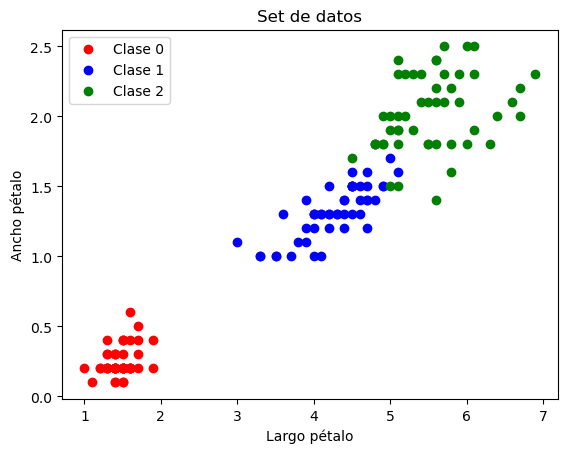

In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X = iris.data[:, 2:4]  # solo los últimos 2 atributos (largo y ancho del pétalo)
y = iris.target

plt.scatter(X[:,0][y == 0], X[:,1][y == 0], color='red', label='Clase 0')
plt.scatter(X[:,0][y == 1], X[:,1][y == 1], color='blue', label='Clase 1')
plt.scatter(X[:,0][y == 2], X[:,1][y == 2], color='green', label='Clase 2')
plt.xlabel('Largo pétalo'), plt.ylabel('Ancho pétalo')
plt.title('Set de datos'), plt.legend()
plt.show()

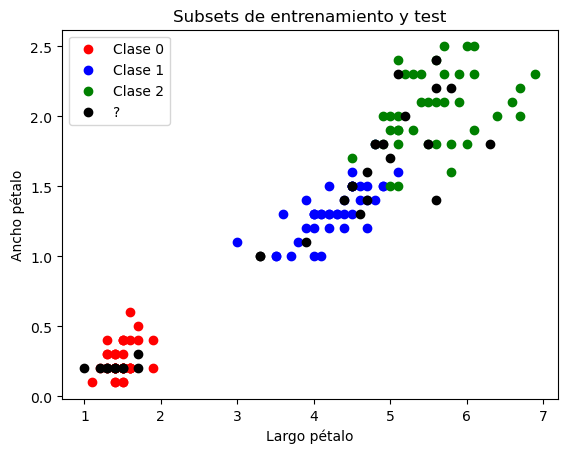

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

plt.scatter(X_train[:,0][y_train == 0], X_train[:,1][y_train == 0], color='red', label='Clase 0')
plt.scatter(X_train[:,0][y_train == 1], X_train[:,1][y_train == 1], color='blue', label='Clase 1')
plt.scatter(X_train[:,0][y_train == 2], X_train[:,1][y_train == 2], color='green', label='Clase 2')
plt.scatter(X_test[:,0], X_test[:,1], color='black', label='?')
plt.legend(), plt.title('Subsets de entrenamiento y test')
plt.xlabel('Largo pétalo'), plt.ylabel('Ancho pétalo')
plt.show()

In [9]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)

print('Clases real = ', y_test)
print('Clases pred = ', y_test_pred)


Clases real =  [0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 2 0 2 1 2 2 1 1 0 2 0]
Clases pred =  [0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 2 0 2 1 2 2 2 1 0 2 0]


In [10]:
from sklearn.metrics import accuracy_score

accuracy_test = accuracy_score(y_test, y_test_pred)
print('El accuracy de la fase de test es: ', accuracy_test)

y_pred_train = clf.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print('El accuracy de la fase de entrenamiento es: ', accuracy_train)

El accuracy de la fase de test es:  0.9666666666666667
El accuracy de la fase de entrenamiento es:  0.9666666666666667


## Otras métricas de clasificación binaria

<center>
    <img src="figures/precisionrecall.png" width="300"/>
</center>
 

\begin{split}
    Accuracy = \frac{TP+TN}{TP+TN+FP+FN} 
\end{split}
<br>

\begin{split}
    Recall = \frac{TP}{TP+FN}
\end{split}
<br>

\begin{split}
    Precision = \frac{TP}{TP+FP}
\end{split}

## Ejemplo "Diagnostic"
- Validación cruzada
- Clasificador SVM con ajuste de hiperparámetros
- Otras métricas de clasificación binaria

<center>
    <img src="figures/diagnostic.jpg" width="400"/>
</center>

https://scikit-learn.org/dev/datasets/toy_dataset.html#breast-cancer-wisconsin-diagnostic-dataset


In [11]:
from sklearn import datasets
X, y = datasets.load_breast_cancer(return_X_y=True, as_frame=True) #cargamos dataset con atributos "X" y target "y"
X.insert(0, "target", y)
display(X) #set de datos

,target,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [12]:
from sklearn.model_selection import cross_val_score

X, y = datasets.load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True, stratify=y)

clf = SVC(kernel='rbf', C=1.0)
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
print(scores)
print('promedio accuracy cross-validation = ', scores.mean())

[0.9125     0.9        0.875      0.92405063 0.94936709]
promedio accuracy cross-validation =  0.9121835443037976


In [15]:
clf = SVC(kernel='linear', C=0.001)
clf.fit(X_train, y_train)
y_test_predict = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_test_predict)
print('El accuracy en la fase de test es: ', accuracy)

El accuracy en la fase de test es:  0.9415204678362573


In [16]:
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'rbf', 'poly'), 'C':[0.01, 0.1, 1, 10, 100]}
clf = SVC()
xclf = GridSearchCV(clf, parameters, scoring='accuracy', cv=5)
xclf.fit(X_train, y_train)
sorted(xclf.cv_results_.keys())

mydict = {'params':xclf.cv_results_['params'], 'rank_test_score':xclf.cv_results_['rank_test_score'], 'mean_test_score':xclf.cv_results_['mean_test_score']}
mydata = pd.DataFrame.from_dict(mydict)
print(mydata)

                             params  rank_test_score  mean_test_score
0   {'C': 0.01, 'kernel': 'linear'}                4         0.957342
1      {'C': 0.01, 'kernel': 'rbf'}               15         0.630696
2     {'C': 0.01, 'kernel': 'poly'}               14         0.836646
3    {'C': 0.1, 'kernel': 'linear'}                1         0.964842
4       {'C': 0.1, 'kernel': 'rbf'}               12         0.891994
5      {'C': 0.1, 'kernel': 'poly'}               13         0.889462
6      {'C': 1, 'kernel': 'linear'}                2         0.962405
7         {'C': 1, 'kernel': 'rbf'}                9         0.912184
8        {'C': 1, 'kernel': 'poly'}               11         0.909652
9     {'C': 10, 'kernel': 'linear'}                3         0.959842
10       {'C': 10, 'kernel': 'rbf'}                8         0.914620
11      {'C': 10, 'kernel': 'poly'}                7         0.919652
12   {'C': 100, 'kernel': 'linear'}                5         0.952310
13      {'C': 100, '

In [17]:
clf = SVC(C=0.1, kernel='linear')
clf.fit(X_train, y_train)
y_test_predict = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_test_predict)
print('El accuracy en la fase de test es: ', accuracy)

El accuracy en la fase de test es:  0.9473684210526315


In [18]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

recall = recall_score(y_test, y_test_predict)
print('El recall en la fase de test es: ', recall)

precision = precision_score(y_test, y_test_predict)
print('El precision en la fase de test es: ', precision)

El recall en la fase de test es:  0.9906542056074766
El precision en la fase de test es:  0.9298245614035088


**Reflexión: ¿por qué es necesario definir otras medidas de clasificación binaria además del accuracy?**

<center>
    <img src="figures/unbalance.png" width="500"/>
</center>

# Sumario
- Los árboles de decisión usan reglas del tipo if-then para ir dividiendo el set de datos.
- El método SVM trabaja con encontrar los hiperplanos que mejor separan distintas clases. También hay un SVM para regresión.
- La búsqueda de malla junto a validación cruzada se pueden usar para ajustar hiperparámetros de un modelo.
- Para clasificación binaria existen otras métricas de desempeño como el recall (exhaustividad) y la precisión.